# plot correlation, current speed and MLD 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cmo
import glob
import sys
from scipy import signal
from scipy.stats import pearsonr
import cartopy.crs as ccrs

In [2]:
pwd

'/Users/yugao/Desktop/PhD/CCSM'

In [3]:
front_ds = xr.open_dataset('./MLD_stats/ACC_front.nc')

In [4]:
LatSACCF, LonSACCF = front_ds.LatSACCF.data[:-1], front_ds.LonSACCF.data[:-1]

In [5]:
LatSAF, LonSAF = front_ds.LatSAF.data[:-1], front_ds.LonSAF.data[:-1]

In [6]:
LatPF, LonPF = front_ds.LatPF.data[:-1], front_ds.LonPF.data[:-1]

## Correlated betwen MLD and SST

In [7]:
HR_ds = xr.open_dataset('./SST_MLD_corr/MLD_SST_corr_HRIE_HRC_0121_to_0149.nc')
HR_ds

<xarray.Dataset>
Dimensions:       (dim: 2, lat: 320, lon: 3600)
Coordinates:
  * lat           (lat) float32 -61.95 -61.85 -61.75 ... -30.25 -30.15 -30.05
  * lon           (lon) float32 0.0 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
Dimensions without coordinates: dim
Data variables:
    SST_MLD_HRC   (dim, lat, lon) float64 ...
    SST_MLD_HRIE  (dim, lat, lon) float64 ...

In [8]:
LR_ds = xr.open_dataset('./SST_MLD_corr/MLD_SST_corr_LRIE_LRC_0130_to_0149.nc')
LR_ds

<xarray.Dataset>
Dimensions:       (dim: 2, y: 59, x: 320)
Dimensions without coordinates: dim, y, x
Data variables:
    SST_MLD_LRC   (dim, y, x) float64 ...
    SST_MLD_LRIE  (dim, y, x) float64 ...
    lat           (y, x) float64 ...
    lon           (y, x) float64 ...

# High-resolution interactive Ensemble and Control

In [9]:
HR_ds.SST_MLD_HRC.data.shape

(2, 320, 3600)

In [10]:
SST_MLD_HRC = HR_ds.SST_MLD_HRC.data[:, :-30]
SST_MLD_HRIE = HR_ds.SST_MLD_HRIE.data[: :-30]
lat = HR_ds.lat.data[:-30]
lon = HR_ds.lon.data[:]

In [11]:
lon_HR, lat_HR = np.meshgrid(lon, lat)

# Low-resolution interactive Ensemble and Control

In [12]:
SST_MLD_LRC = LR_ds.SST_MLD_LRC.data
SST_MLD_LRIE = LR_ds.SST_MLD_LRIE.data
lat_LR = LR_ds.lat.data
lon_LR = LR_ds.lon.data

In [13]:
corr_min, corr_max = -1, 1

In [14]:
polar_extent = [-180, 180, -90, -30]

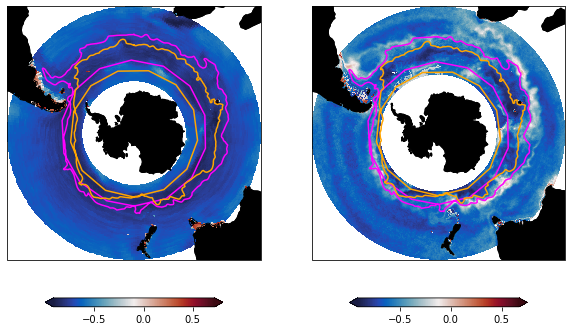

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors
import cmocean.cm as cmo
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 7), subplot_kw={'projection': ccrs.SouthPolarStereo()})

#clevs = np.linspace(-1, 1.1, 11)
cmap = cmo.balance

#ax1.set_extent(polar_extent, crs=ccrs.PlateCarree())
# First plot
#ax1.set_title('a) MLD - SST correlation, LRC', fontsize = 15)
cs = ax1.pcolormesh(lon_LR, lat_LR, SST_MLD_LRC[0], transform=ccrs.PlateCarree(), cmap=cmap)
ax1.plot(LonSAF, LatSAF, 'magenta', label='SAF', transform=ccrs.PlateCarree())
ax1.plot(LonPF, LatPF, 'orange', label='PF', transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, color='black')
ax1.coastlines()
plt.colorbar(cs, ax=[ax1], orientation='horizontal', shrink=0.7, pad=0.1, extend='both')

# Second plot
#ax3.set_extent(polar_extent, crs=ccrs.PlateCarree())
#ax3.set_title('b) MLD-SST correlation, HRC', fontsize = 15)
cs = ax3.pcolormesh(lon_HR, lat_HR, SST_MLD_HRC[0],# levels = np.arange(-1.1, 1.1, 0.1), 
                  transform=ccrs.PlateCarree(), cmap=cmap)
ax3.plot(LonSAF, LatSAF, 'magenta', label='SAF', transform=ccrs.PlateCarree())
ax3.plot(LonPF, LatPF, 'orange', label='PF', transform=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, color='black')
ax3.coastlines()
plt.colorbar(cs, ax=[ax3], orientation='horizontal', shrink=0.7, pad=0.1, extend='both')

# Add colorbar
#cbar = plt.colorbar(cs, ax=[ax1, ax3], orientation='horizontal', shrink=0.7, pad=0.1, extend='both')

plt.savefig('MLD_SST_correlation.png', dpi=100)
plt.show()


In [16]:
UV_ds = xr.open_dataset('./SST_MLD_corr//UV0_mean_LRIE_LRC_0121_to_0150.nc')

In [17]:
U_LRC, V_LRC = UV_ds.U_LRC.data, UV_ds.V_LRC.data
U_LRIE, V_LRIE = UV_ds.U_LRIE.data, UV_ds.V_LRIE.data

In [18]:
speed_LRC = np.sqrt(U_LRC ** 2, V_LRC ** 2) / 100 # cm to m
speed_LRIE = np.sqrt(U_LRIE ** 2, V_LRIE ** 2) / 100

In [19]:
UV_HR_ds = xr.open_dataset('./SST_MLD_corr/UV0_mean_HRIE_HRC_0130_to_0149.nc')
UV_HR_ds

<xarray.Dataset>
Dimensions:  (lat: 320, lon: 3600)
Coordinates:
  * lat      (lat) float32 -61.95 -61.85 -61.75 -61.65 ... -30.25 -30.15 -30.05
  * lon      (lon) float32 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Data variables:
    U_HRC    (lat, lon) float32 ...
    V_HRC    (lat, lon) float32 ...
    U_HRIE   (lat, lon) float32 ...
    V_HRIE   (lat, lon) float32 ...

In [20]:
U_HRC = UV_HR_ds.U_HRC.data[:-30]
V_HRC = UV_HR_ds.V_HRC.data[:-30]
U_HRIE = UV_HR_ds.U_HRIE.data[:-30]
V_HRIE = UV_HR_ds.V_HRIE.data[:-30]

In [21]:
speed_HRC = np.sqrt(U_HRC ** 2, V_HRC ** 2) / 100
speed_HRIE = np.sqrt(U_HRIE ** 2, V_HRIE ** 2) / 100

In [22]:
speed_min, speed_max = 0, 0.4

In [23]:
speed_diff_min, speed_diff_max = -0.2, 0.2

/Users/yugao/opt/miniconda3/envs/pyenv/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/yugao/opt/miniconda3/envs/pyenv/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


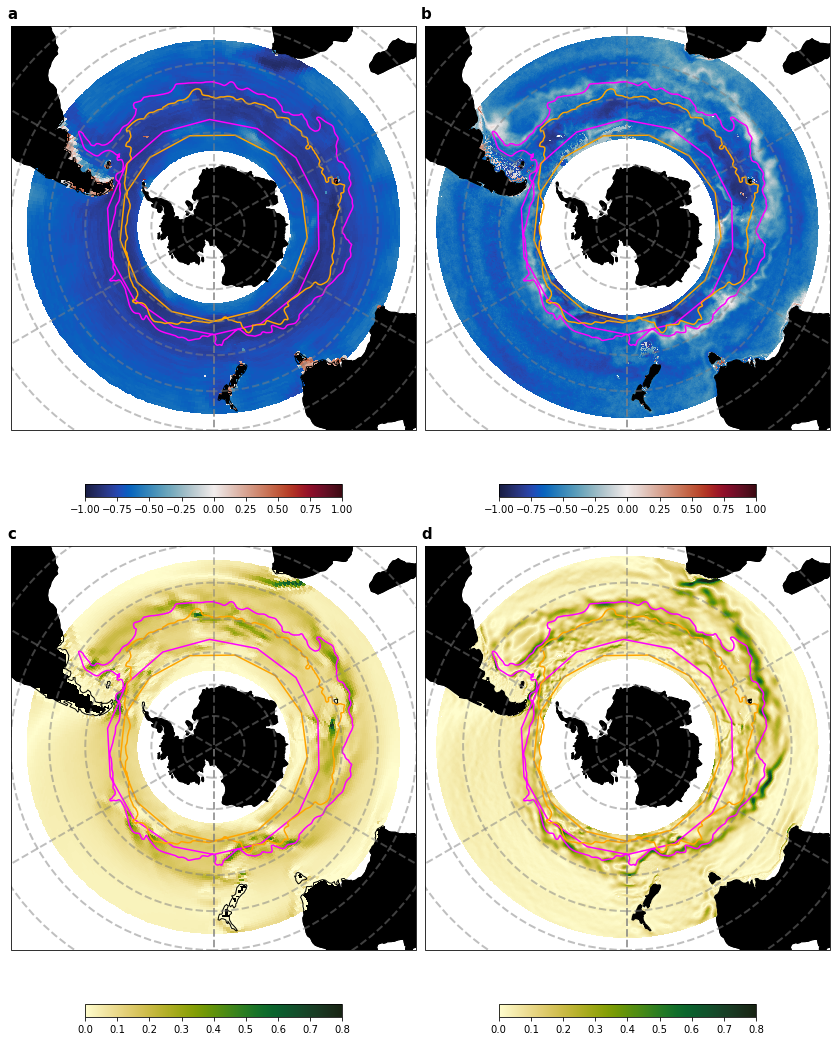

In [29]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import numpy as np

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 15), subplot_kw={'projection': ccrs.SouthPolarStereo()})

cmap = cmo.balance

# Configure common attributes
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_extent(polar_extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, color='black')
    ax.coastlines()
    ax.plot(LonSAF, LatSAF, 'magenta', label='SAF', transform=ccrs.PlateCarree())
    ax.plot(LonPF, LatPF, 'orange', label='PF', transform=ccrs.PlateCarree())

    # Gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# First plot
cs1 = ax1.pcolormesh(lon_LR, lat_LR, SST_MLD_LRC[0], vmin = -1., vmax = 1., 
                   transform=ccrs.PlateCarree(), cmap=cmap)
                     #transform=ccrs.PlateCarree(), cmap=cmap)
plt.colorbar(cs1, ax=ax1, orientation='horizontal', shrink=0.6, pad=0.1)

# Second plot
cs2 = ax2.pcolormesh(lon_HR, lat_HR, SST_MLD_HRC[0], vmin = -1., vmax = 1., 
                   transform=ccrs.PlateCarree(), cmap=cmap)
plt.colorbar(cs2, ax=ax2, orientation='horizontal', shrink=0.6, pad=0.1)

# Third plot (assuming similar to first for now, replace with different data as necessary)
cs3 = ax3.pcolormesh(lon_LR, lat_LR, speed_LRC, vmin = 0, vmax = .8, 
                   transform=ccrs.PlateCarree(), cmap=cmo.speed)  
plt.colorbar(cs3, ax=ax3, orientation='horizontal', shrink=0.6, pad=0.1)


# Fourth plot (assuming similar to second for now, replace with different data as necessary)
cs4 = ax4.pcolormesh(lon_HR, lat_HR, speed_HRC, vmin = 0, vmax = .8, 
                   transform=ccrs.PlateCarree(), cmap=cmo.speed)  
plt.colorbar(cs4, ax=ax4, orientation='horizontal', shrink=0.6, pad=0.1)

plt.tight_layout()

# ... (previous code)

# Labels for each subplot
ax1.text(-0.01, 1.02, 'a', transform=ax1.transAxes, size=15, weight='bold')
ax2.text(-0.01, 1.02, 'b', transform=ax2.transAxes, size=15, weight='bold')
ax3.text(-0.01, 1.02, 'c', transform=ax3.transAxes, size=15, weight='bold')
ax4.text(-0.01, 1.02, 'd', transform=ax4.transAxes, size=15, weight='bold')

# ... (rest of your code)


plt.savefig('MLD_SST_correlation.png', dpi=100)
plt.show()
